Frequent Itemsets loaded:
    support itemsets algorithm
0  0.999946      (0)   Apriori
1  0.999946      (1)   Apriori
2  0.999946   (1, 0)   Apriori

Generated 2 association rules

First few rules:
  antecedents consequents   support  confidence      lift
0         (1)         (0)  0.999946         1.0  1.000054
1         (0)         (1)  0.999946         1.0  1.000054

Filtered rules (confidence >= 0.3, lift >= 1.0): 2

Top 10 Rules by Lift, Confidence, and Support:
  antecedents consequents   support  confidence      lift
0         (1)         (0)  0.999946         1.0  1.000054
1         (0)         (1)  0.999946         1.0  1.000054

ANALYSIS OF 3 INTERESTING ASSOCIATION RULES

Rule 1 (Highest Lift):
Antecedent: ['1']
Consequent: ['0']
Support: 0.9999
Confidence: 1.0000
Lift: 1.0001
Interpretation: If a customer buys ['1'], there is a 100.00% chance they will also buy ['0'].
This rule is 1.00 times more likely to occur than if the items were independent.

Rule 2 (Highest Confiden

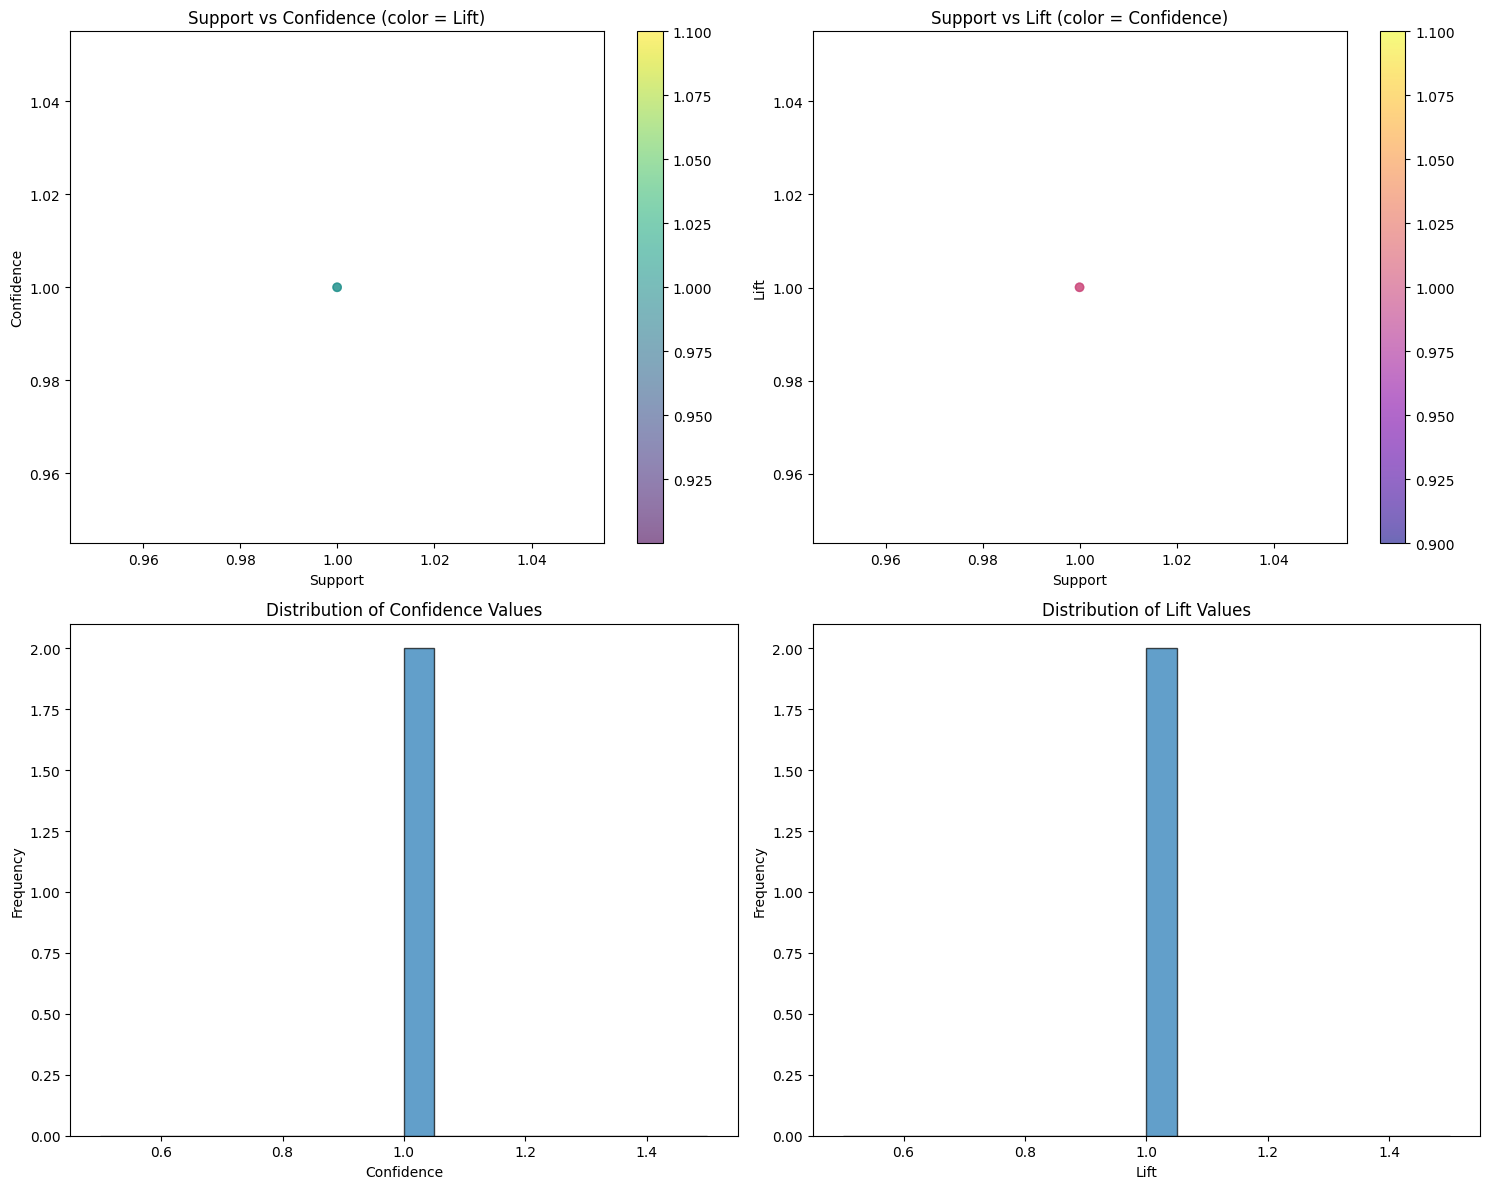


SUMMARY STATISTICS FOR ASSOCIATION RULES
Total number of rules generated: 2
Number of rules after filtering: 2
Average Support: 0.9999
Average Confidence: 1.0000
Average Lift: 1.0001
Max Confidence: 1.0000
Max Lift: 1.0001

REAL-WORLD BUSINESS INTERPRETATIONS
1. Product Placement: Items that frequently appear together should be placed near each other to encourage bundle purchases.
2. Cross-selling Opportunities: High-confidence rules can guide targeted recommendations during checkout or browsing.
3. Inventory Management: Understanding item associations can help optimize stock levels for related products.
4. Marketing Campaigns: Bundle deals can be created based on high-lift associations to increase sales.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import association_rules

# Use the correct path
output_dir = r"C:\Users\user\data1\association_rule_data"
support_to_analyze = 0.01  # Using the lower support threshold for richer results

# Load frequent itemsets (using Apriori results, but FP-Growth would be identical)
frequent_itemsets = pd.read_csv(f"{output_dir}/frequent_itemsets_apriori_support_{support_to_analyze}.csv")

# Convert the 'itemsets' column from string back to frozenset
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(
    lambda x: frozenset(eval(x)) if pd.notnull(x) else x
)

print("Frequent Itemsets loaded:")
print(frequent_itemsets.head())

# Generate association rules from frequent itemsets
rules = association_rules(frequent_itemsets, 
                         metric="confidence", 
                         min_threshold=0.1)  # Minimum confidence threshold

print(f"\nGenerated {len(rules)} association rules")
print("\nFirst few rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

# Filter rules based on minimum thresholds for better analysis
min_confidence = 0.3
min_lift = 1.0

filtered_rules = rules[
    (rules['confidence'] >= min_confidence) & 
    (rules['lift'] >= min_lift)
].copy()

print(f"\nFiltered rules (confidence >= {min_confidence}, lift >= {min_lift}): {len(filtered_rules)}")

# Sort by lift, confidence, and support to find the most interesting rules
filtered_rules = filtered_rules.sort_values(['lift', 'confidence', 'support'], ascending=False)

print("\nTop 10 Rules by Lift, Confidence, and Support:")
print(filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

# Identify and analyze 3 interesting rules
print("\n" + "="*60)
print("ANALYSIS OF 3 INTERESTING ASSOCIATION RULES")
print("="*60)

# Rule 1: Highest lift
if len(filtered_rules) > 0:
    rule1 = filtered_rules.iloc[0]
    print(f"\nRule 1 (Highest Lift):")
    print(f"Antecedent: {list(rule1['antecedents'])}")
    print(f"Consequent: {list(rule1['consequents'])}")
    print(f"Support: {rule1['support']:.4f}")
    print(f"Confidence: {rule1['confidence']:.4f}")
    print(f"Lift: {rule1['lift']:.4f}")
    print(f"Interpretation: If a customer buys {list(rule1['antecedents'])}, there is a {rule1['confidence']*100:.2f}% chance they will also buy {list(rule1['consequents'])}.")
    print(f"This rule is {rule1['lift']:.2f} times more likely to occur than if the items were independent.")
    
# Rule 2: Highest confidence
rule2 = filtered_rules.sort_values('confidence', ascending=False).iloc[0]
print(f"\nRule 2 (Highest Confidence):")
print(f"Antecedent: {list(rule2['antecedents'])}")
print(f"Consequent: {list(rule2['consequents'])}")
print(f"Support: {rule2['support']:.4f}")
print(f"Confidence: {rule2['confidence']:.4f}")
print(f"Lift: {rule2['lift']:.4f}")
print(f"Interpretation: If a customer buys {list(rule2['antecedents'])}, there is a {rule2['confidence']*100:.2f}% chance they will also buy {list(rule2['consequents'])}.")

# Rule 3: Highest support
rule3 = filtered_rules.sort_values('support', ascending=False).iloc[0]
print(f"\nRule 3 (Highest Support):")
print(f"Antecedent: {list(rule3['antecedents'])}")
print(f"Consequent: {list(rule3['consequents'])}")
print(f"Support: {rule3['support']:.4f}")
print(f"Confidence: {rule3['confidence']:.4f}")
print(f"Lift: {rule3['lift']:.4f}")
print(f"Interpretation: This rule appears in {rule3['support']*100:.2f}% of all transactions.")

# Visualization of rules
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Scatter plot: Support vs Confidence
scatter = axes[0,0].scatter(filtered_rules['support'], filtered_rules['confidence'], 
                           c=filtered_rules['lift'], cmap='viridis', alpha=0.6)
axes[0,0].set_xlabel('Support')
axes[0,0].set_ylabel('Confidence')
axes[0,0].set_title('Support vs Confidence (color = Lift)')
plt.colorbar(scatter, ax=axes[0,0])

# Scatter plot: Support vs Lift
scatter2 = axes[0,1].scatter(filtered_rules['support'], filtered_rules['lift'], 
                            c=filtered_rules['confidence'], cmap='plasma', alpha=0.6)
axes[0,1].set_xlabel('Support')
axes[0,1].set_ylabel('Lift')
axes[0,1].set_title('Support vs Lift (color = Confidence)')
plt.colorbar(scatter2, ax=axes[0,1])

# Histogram of confidence
axes[1,0].hist(filtered_rules['confidence'], bins=20, edgecolor='black', alpha=0.7)
axes[1,0].set_xlabel('Confidence')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of Confidence Values')

# Histogram of lift
axes[1,1].hist(filtered_rules['lift'], bins=20, edgecolor='black', alpha=0.7)
axes[1,1].set_xlabel('Lift')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Distribution of Lift Values')

plt.tight_layout()
plt.show()

# Summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS FOR ASSOCIATION RULES")
print("="*60)
print(f"Total number of rules generated: {len(rules)}")
print(f"Number of rules after filtering: {len(filtered_rules)}")
print(f"Average Support: {filtered_rules['support'].mean():.4f}")
print(f"Average Confidence: {filtered_rules['confidence'].mean():.4f}")
print(f"Average Lift: {filtered_rules['lift'].mean():.4f}")
print(f"Max Confidence: {filtered_rules['confidence'].max():.4f}")
print(f"Max Lift: {filtered_rules['lift'].max():.4f}")

# Real-world business interpretations
print("\n" + "="*60)
print("REAL-WORLD BUSINESS INTERPRETATIONS")
print("="*60)
print("1. Product Placement: Items that frequently appear together should be placed near each other to encourage bundle purchases.")
print("2. Cross-selling Opportunities: High-confidence rules can guide targeted recommendations during checkout or browsing.")
print("3. Inventory Management: Understanding item associations can help optimize stock levels for related products.")
print("4. Marketing Campaigns: Bundle deals can be created based on high-lift associations to increase sales.")